21.03.10 Python 데이터 시각화(Matplotlib)

# CH13. 데이터 시각화

# 1절. 시각화 개요
- 시각화 라이브러리
  - matplotlib, seaborn, folium(지도 시각화) 등
- matplotlib : 파이썬에서 가장 많이 사용되는 시각화 라이브러리, Pandas에 내부적으로 포함
- seaborn : matplotlib을 기반으로 다양한 테마, 차트 등 기능을 추가한 라이브러리

# 2절. matplotlib
- https://matplotlib.org/stable/api/pyplot_summary.html

## 2.1 패키지 import 및 기본설정

In [1]:
import matplotlib
import matplotlib.pyplot as plt

- 예전 버전일 경우 : %matplotlib.inline (주피터노트북이 실행되는 브라우저에서 시각화를 실행)
- %config lnlineBackend.figure_formate = 'retina' : 그래프의 해상도를 높임 'png'가 기본값


In [9]:
%matplotlib inline
%config lnlineBackend.figure_formate = 'retina'

In [4]:
matplotlib.__version__

'3.3.2'

- Matplotlib으로 그래프를 그리기 위해 다음 단계를 따른다.
-    1) 데이터 준비
-    2) 그래프 생성
-    3) 함수로 그래프 그리기
-    4) 그래프 커스터마이징
-    5) 그래프 출력 및 저장

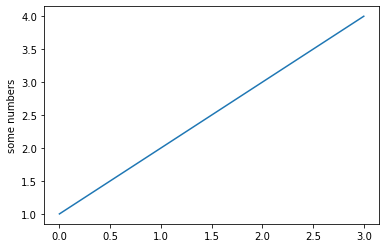

In [10]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

## 2.2 그래프 객체

In [11]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

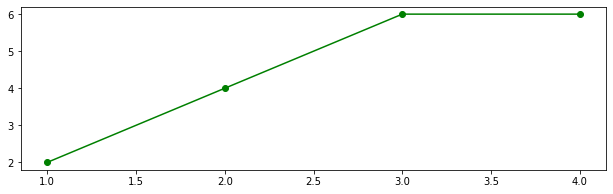

In [15]:
plt.figure(figsize=(10.5,3))
plt.plot([1,2,3,4], [2,4,6,6], 'go-')
plt.show()

## 2.3 그래프 영역 나누기
* 1) subplot() 함수로 서브플롯 추가

In [17]:
import numpy as np
x = np.arange(0, 10, 0.01)
x.shape

(1000,)

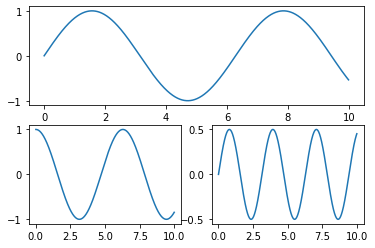

In [20]:
plt.subplot(2,1,1) # 2행 1열의 subplot을 생성하고 1번째 subplot에 plot를 그린다.
# plt.subplot(211)
plt.plot(x, np.sin(x))
plt.subplot(2,2,3)
plt.plot(x, np.cos(x))
plt.subplot(2,2,4)
plt.plot(x, np.sin(x)*np.cos(x))
plt.show()

In [26]:
import pandas as pd
pd.np.nan

<ipython-input-26-3ffa0fdd0d4b>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.nan


nan

In [27]:
# 경고 메세지 안보이게
import warnings
warnings.filterwarnings(action='ignore')

In [25]:
# 경고 메세지 보이게
warnings.filterwarnings(action='default')

- 2) subplots() 함수로 서브플롯 그리기

In [28]:
x = np.arange(0,10,0.01)
x.shape

(1000,)

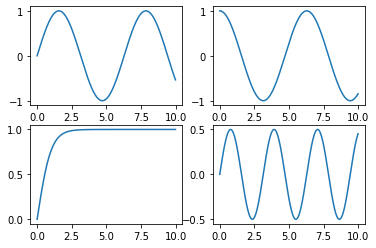

In [31]:
# 방법 1. 2행 2열 서브플롯
plt.subplot(2,2,1); plt.plot(x, np.sin(x))
plt.subplot(2,2,2); plt.plot(x, np.cos(x))
plt.subplot(2,2,3); plt.plot(x, np.tanh(x))
plt.subplot(2,2,4); plt.plot(x, np.sin(x)*np.cos(x))
plt.show()

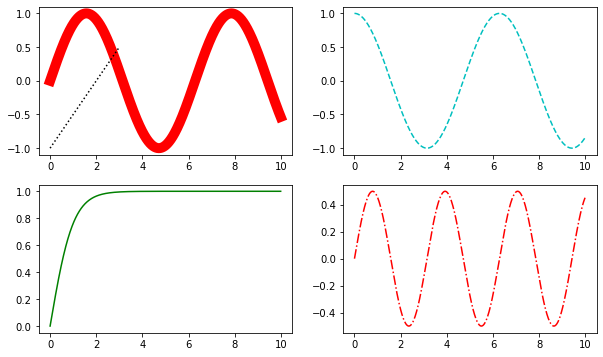

In [37]:
# 방법 2. 2행 2열 서브플롯
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize=(10,6))
axes[0,0].plot(x, np.sin(x), color="r", linewidth=10)
axes[0,0].plot([0,1,2,3],[-1,-0.5,0,0.5],'k:')
axes[0,1].plot(x, np.cos(x), 'c--') # c(청록) --(대시드)
axes[1,0].plot(x, np.tanh(x), 'g')
axes[1,1].plot(x, np.sin(x)*np.cos(x), 'r-.')
plt.show()

In [39]:
# 방법 3. 2행 2열 서브플롯
x = np.arange(0,7,0.01)
x.shape

(700,)

In [45]:
# def sin_cos(x):
#     return np.sin(x)*np.cos(x)
# func_list = [np.sin, np.cos, np.tanh, sin_cos]
func_list = [np.sin, np.cos, np.tanh, lambda x : np.sin(x)*np.cos(x)]
fmt_list = ['k:', 'c--', 'g', 'r-,']

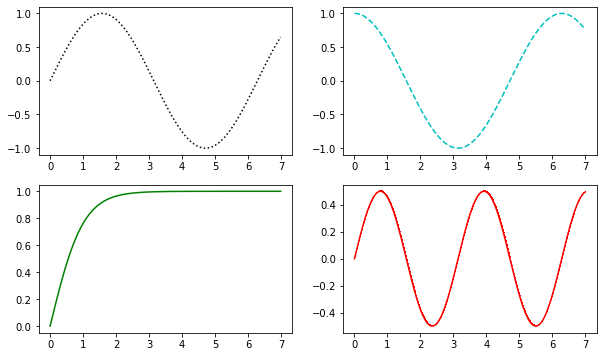

In [46]:
fig, axes = plt.subplots(2,2, figsize=(10,6))
# 2차원 axis를 list(axes.flat) 이용하여 중첩 for문을 사용하지 않는다.

for i, ax in enumerate(axes.flat):
    ax.plot(x, func_list[i](x), fmt_list[i])


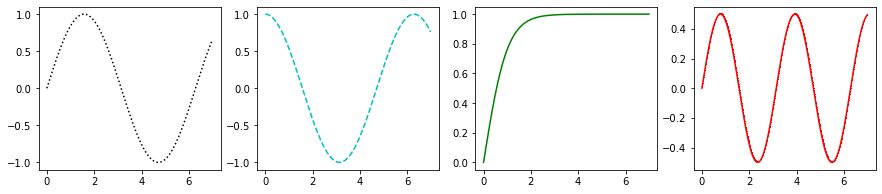

In [52]:
fig, axes = plt.subplots(ncols=4, figsize=(15,3))
for i, ax in enumerate(axes):
    ax.plot(x, func_list[i](x), fmt_list[i])
plt.show()

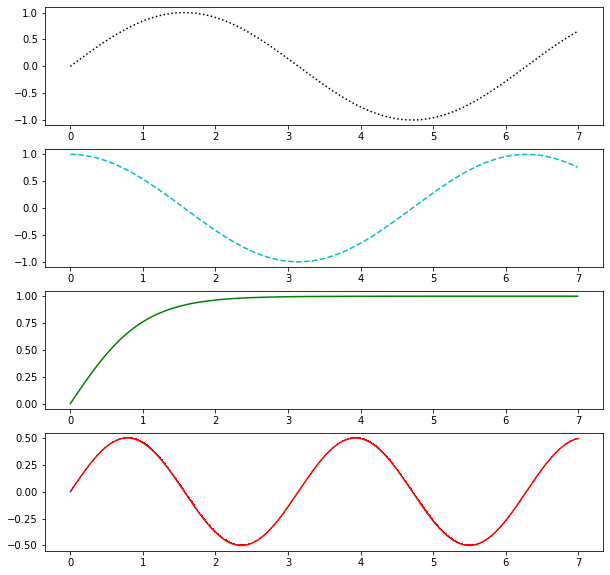

In [54]:
fig, axes = plt.subplots(nrows=4, figsize=(10,10))
for i, ax in enumerate(axes):
    ax.plot(x, func_list[i](x), fmt_list[i])
plt.show()

## 2.4 다양한 그래프 그리기
- 1) pyplot 함수들 : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html
- 2) plot() : 선 그래프

In [55]:
np.random.randn(4,10) # 4행 10열 짜리 난수 발생(편균 0, 표준편차 1)

array([[ 0.20731864, -1.57182586, -0.79955062, -1.89144735, -0.35221465,
         0.23538353,  0.32257795, -1.36957703, -0.10741605,  1.12179218],
       [ 1.02538973,  0.92841525,  2.02603294, -0.81769461,  0.33059101,
         1.02079779, -0.04704957, -0.29419027, -0.78586776, -0.71255011],
       [ 0.93658791,  1.62699583, -0.69097875,  0.27737479, -1.25166773,
         0.74825275,  0.35415307,  0.11328506, -0.07151429,  0.36279407],
       [ 0.56522761, -0.24349134,  0.9290463 , -0.5579136 , -1.91086108,
        -0.97087639, -0.20763171,  0.32496867,  0.8748501 , -0.44979067]])

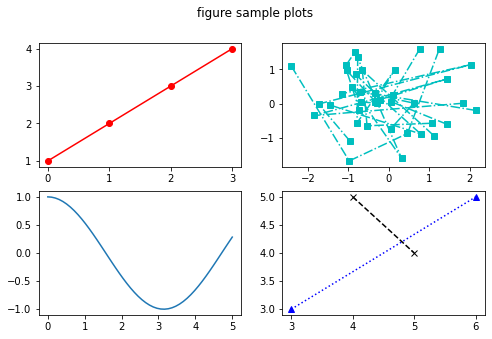

In [64]:
fig, axes = plt.subplots(2, 2, figsize=(8,5))
fig.suptitle('figure sample plots')
axes[0,0].plot([1,2,3,4], 'ro-') # r: 빨강, o:동그라미 마크, -: 실선
axes[0,1].plot(np.random.randn(4,10),
               np.random.randn(4,10),'cs-.')
axes[1,0].plot(np.linspace(0,5),
              np.cos(np.linspace(0,5)))
axes[1,1].plot([3,6],[3,5],'b^:')
axes[1,1].plot([4,5],[5,4],'kx--')
plt.show()

- 3) pandas.DataFrame.plot()
- plot(x=None, y=None, kind='line', figsize=None, title=None, grid=Nonr, xlim...)
    - kind : line, scatter, bar, bath(수평바), hist, box...
    - figsize: tuple(인치단위)
    - xlim, ylim : list/tuple

In [65]:
import seaborn as sns
iris_df =  sns.load_dataset('iris')

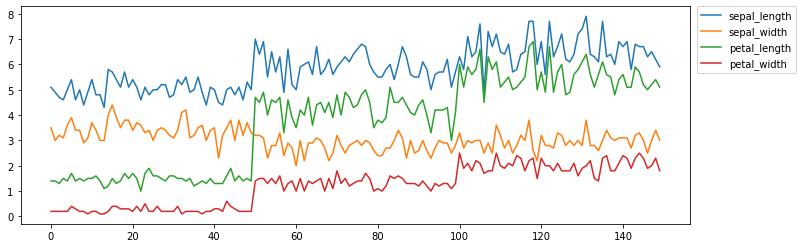

In [68]:
iris_df.plot(figsize=(12,4))
plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0)
plt.show()

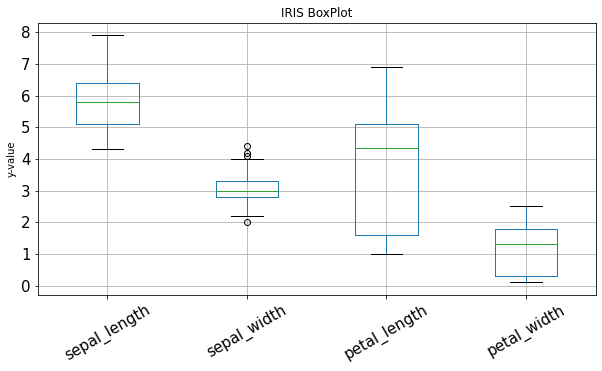

In [72]:
iris_df.plot(kind='box', figsize=(10,5), title='IRIS BoxPlot',
             ylabel='y-value', grid=True, fontsize=15, rot=30)
plt.show()

In [73]:
# iris_df에서 상관관계가 가장 높은 두 변수의 scatter plot을 그리시오.
iris_df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


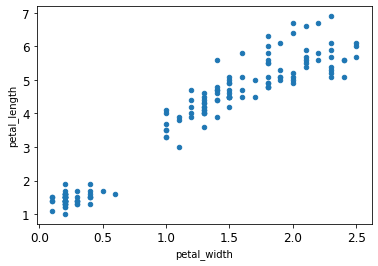

In [77]:
iris_df.plot(kind='scatter', x='petal_width', y='petal_length', fontsize=12)
plt.show()

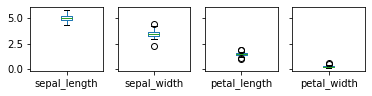

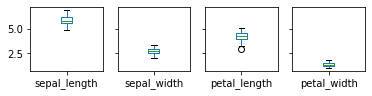

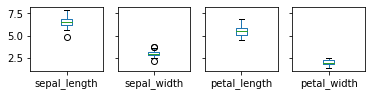

In [82]:
iris_df.groupby(iris_df['species']).plot(kind='box',
                                         subplots=True, # 서브 플롯으로
                                         sharey=True,   # y축 공유
                                         layout=(3,4)) 
plt.show()

- 4) pyplot.scatter() : 산점도

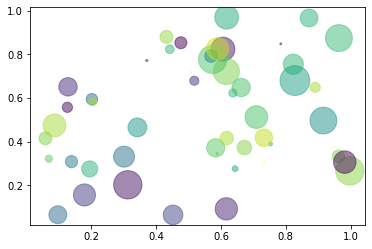

In [85]:
np.random.seed(2021)
N = 50
x = np.random.rand(N) # 난수 50개
y = np.random.rand(N)

colors = np.random.rand(N)
area = (np.random.rand(N) * 30)**2
plt.scatter(x,y, s=area,    # 마커의 크기
                 c=colors,  # 색상
                 alpha=0.5) # 투명도 0(투명), 1(불투명)
plt.show()

## 2.5 다양한 그래프 그리기 예시
- https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html
- 1) fill(), fill_between() 
- 2) bar(), axvline(), axhline()...
- 3) hist(), boxplot(), violinplot()

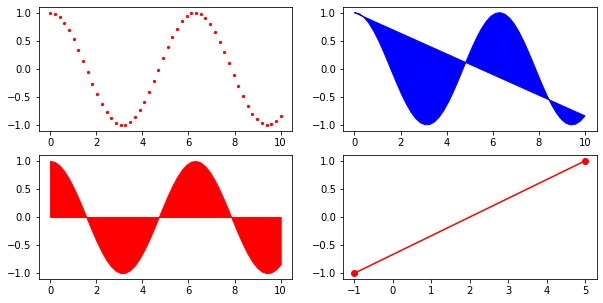

In [101]:
x = np.linspace(0,10)
y = np.cos(x)
fig, axes = plt.subplots(2,2, figsize=(10,5))
axes[0,0].scatter(x, y, s=5, c='r', marker='o')
axes[0,1].fill(x, y, c='b')
axes[1,0].fill_between(x, y, color='r')
axes[1,1].plot([-1,5],[-1,1], 'ro-')

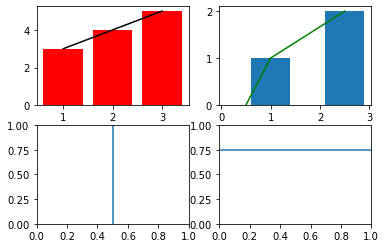

In [90]:
fig, axes = plt.subplots(2,2)
axes[0,0].bar([1,2,3],[3,4,5], color='r')
axes[0,0].plot([1,2,3],[3,4,5], 'k')
axes[0,1].bar([0.5,1,2.5],[0,1,2])
axes[0,1].plot([0.5,1,2.5],[0,1,2],'g')
axes[1,0].axvline(0.5)
axes[1,1].axhline(0.75)
plt.show()

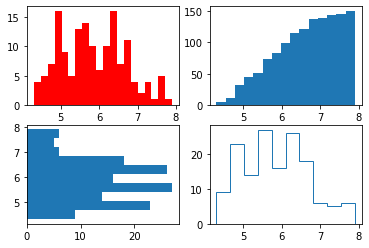

In [96]:
fig, axes = plt.subplots(2,2)
axes[0,0].hist(iris_df['sepal_length'], bins=20, color='r')
axes[0,1].hist(iris_df['sepal_length'], bins=15, cumulative=True)
axes[1,0].hist(iris_df['sepal_length'], bins=10, orientation='horizontal')
axes[1,1].hist(iris_df['sepal_length'], bins=10, histtype='step')
plt.show()

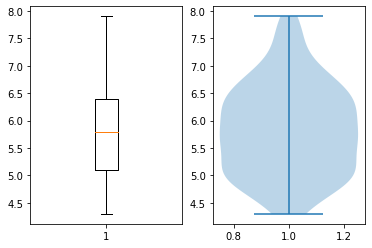

In [98]:
fig, axes = plt.subplots(1,2)
axes[0].boxplot(iris_df['sepal_length'])
axes[1].violinplot(iris_df['sepal_length'])
plt.show()

## 2.6 그래프 커스터마이징

- 1) linestyle, linewidth

In [99]:
x = np.linspace(0,10,100)
y = np.cos(x)

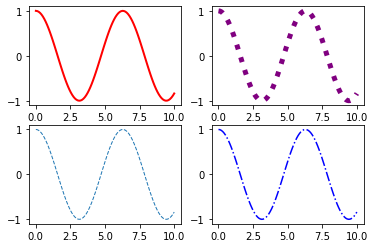

In [100]:
fig, axes = plt.subplots(2,2)
axes[0,0].plot(x, y, linewidth=2, color='r')
axes[0,1].plot(x, y, ls='dotted', linewidth=5, color='purple')
axes[1,0].plot(x, y, ls='--', linewidth=1)
axes[1,1].plot(x, y, ls='-.', color='b')

- 2) text(), annotate()

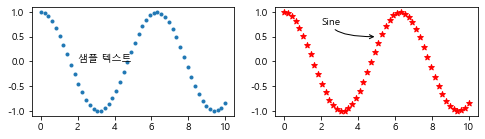

In [105]:
fig, axes = plt.subplots(1, 2, figsize=(8,2))
axes[0].scatter(x, y, marker='.')
axes[0].text(2, 0, '샘플 텍스트', style='italic')
axes[1].scatter(x, y, marker='*',color='r')
axes[1].annotate('Sine', xytext=(2,0.75), # 글자가 있을 좌표 위치
                xy=(5,0.5), # 화살표가 가리킬 좌표 위치
                arrowprops = dict(arrowstyle='->',
                                  connectionstyle='angle3'))
plt.show()

In [104]:
# 한글 기본폰트 설정
plt.rc("font", family="Malgun Gothic") # 윈도우즈
# plt.rc("font", family="AppleGothic") # MAC
plt.rc("axes", unicode_minus=False) # 축

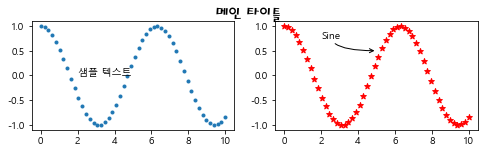

In [106]:
# 원하는 한글 폰트 지정
import matplotlib.font_manager as fm
font_path = 'C:/Windows/Fonts/HMKMMAG.TTF'
font_prop = fm.FontProperties(fname=font_path, size=15)
fig, axes = plt.subplots(1, 2, figsize=(8,2))
plt.suptitle("메인 타이틀", fontproperties=font_prop)

axes[0].scatter(x, y, marker='.')
axes[0].text(2, 0, '샘플 텍스트', style='italic')
axes[1].scatter(x, y, marker='*',color='r')
axes[1].annotate('Sine', xytext=(2,0.75), # 글자가 있을 좌표 위치
                xy=(5,0.5), # 화살표가 가리킬 좌표 위치
                arrowprops = dict(arrowstyle='->',
                                  connectionstyle='angle3'))
plt.show()

In [107]:
print(matplotlib.matplotlib_fname())
# 아래의 파일에 font.family를 조정하고 다시 실행

C:\Users\tjoeun\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc


- 3) 수학기호 
-  https://matplotlib.org/api/axes_api.html#text-and-annotations

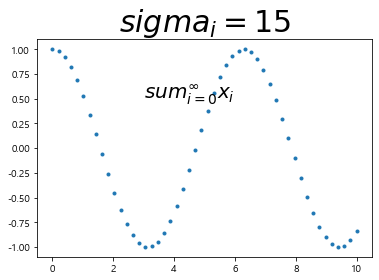

In [108]:
fig, ax = plt.subplots()
ax.scatter(x,y, marker='.')
ax.set_title(r'$sigma_i=15$', fontsize=30)
ax.text(3,0.5,r'$sum_{i=0}^\infty x_i$', fontsize=20)
plt.show()

In [1]:
# 수업 시작전 설정
import matplotlib.pyplot as plt
%matplotlib inline
%config lnlineBackend.figure_formate = 'retina'

# 한글 설정
plt.rc("font", family="Malgun Gothic") 
plt.rc("axes", unicode_minus=False) # y축

# 경고 메세지 안보이게
import warnings
warnings.filterwarnings(action='ignore')

- 4) 축과 눈금

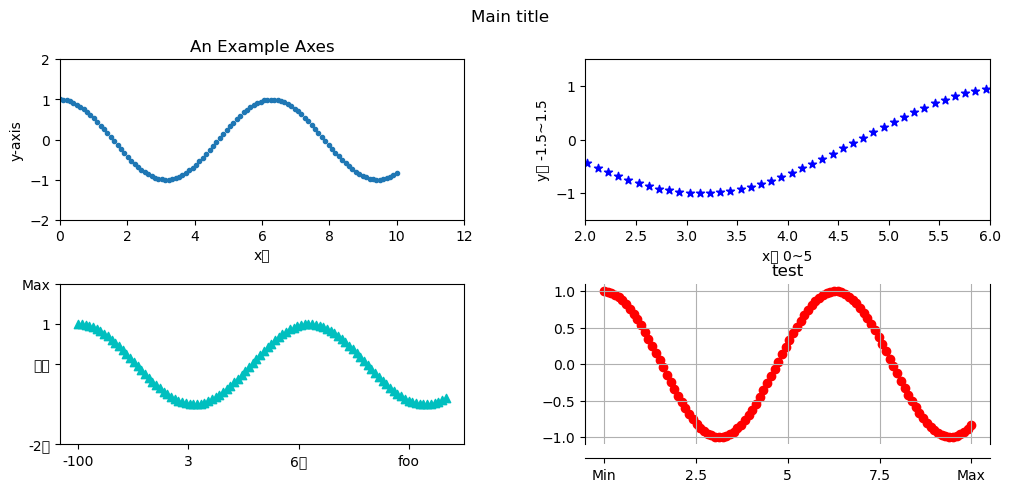

In [35]:
x = np.linspace(0,10,100)
y = np.cos(x)
fig, axes = plt.subplots(2,2, figsize=(12,5))
# plt.subplots_adjust()을 사용하여 서브플롯간의 간격 변경
plt.subplots_adjust(hspace=0.4, wspace=0.3) # hspace은 위아래 여백 wspace 옆여백

plt.suptitle('Main title')
axes[0,0].scatter(x, y, marker='.')
axes[0,0].set(title="An Example Axes", ylabel="y-axis", xlabel="x축",
             xlim=[0,12], ylim=[-2,2]) # 축 변경
axes[0,1].scatter(x, y, marker='*', c='b')
axes[0,1].set_xlim(2,6)
axes[0,1].set_xlabel('x축 0~5')
axes[0,1].set_ylim(-1.5,1.5)
axes[0,1].set_ylabel('y축 -1.5~1.5')
axes[1,0].scatter(x, y, marker='^', c='c')
# x축 눈금 위치
axes[1,0].set_xticks(range(0,11,3))
axes[1,0].set_xticklabels([-100,3, '6개','foo'])
axes[1,0].set_yticks([-2,0,1,2])
axes[1,0].set_yticklabels(['-2개','제로',1,'Max'])

axes[1,1].scatter(x, y, c='r')
axes[1,1].set(xticks=[0, 2.5, 5, 7.5, 10],
              xticklabels=['Min', 2.5, 5, 7.5, 'Max'],
              title='test')
axes[1,1].grid(True)
axes[1,1].spines["top"].set_visible(False)
axes[1,1].spines["bottom"].set_position(("outward",10))

plt.show()
# https://matplotlib.org/3.1.0/api/axis_api.html 참조

- 5) 축 공유

In [20]:
x = np.arange(0,10)
y1 = 0.5 * x**2 # 0.5*(x**2)
y2 = -1*y1

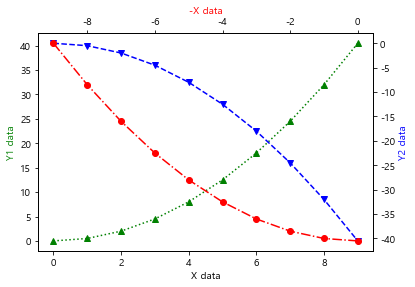

In [25]:
fig, ax1 = plt.subplots()
ax1.plot(x,y1,'g^:')
ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')

ax2 = ax1.twinx()
ax2.plot(x, y2, 'bv--')
ax2.set_ylabel('Y2 data', color='b')

ax3 = ax1.twiny()
ax3.plot(-x, y1, 'ro-.')
ax3.set_xlabel('-X data', color='r')

plt.show()

- 6) 그래프 제목과 축 제목 

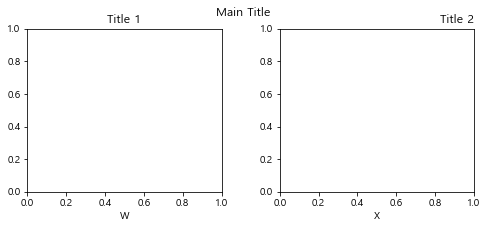

In [26]:
fig, axes = plt.subplots(1,2, figsize=(8,3))
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.suptitle('Main Title')

axes[0].set_title('Title 1')
axes[0].set_xlabel('W')

axes[1].set_title('Title 2', loc='right')
axes[1].set_xlabel('X')

plt.show()

- 7) 범례표시

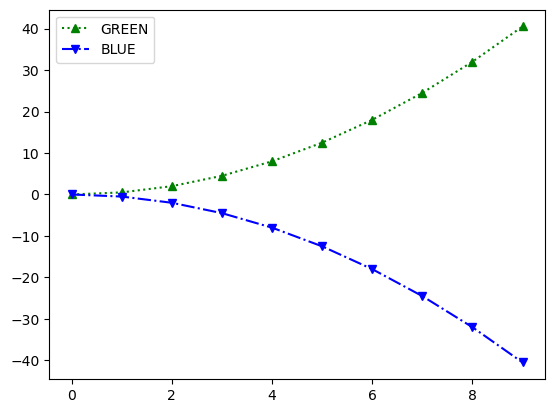

In [34]:
x = np.arange(0,10)
y = 0.5 * x **2

plt.style.use('default')
fig, ax1 = plt.subplots()
ax1.plot(x, y, 'g^:', label='GREEN')
ax1.plot(x, -y, 'bv-.', label='BLUE')
ax1.legend() # 그래프 함수가 라벨을 갖는경우 
plt.savefig('ch13.png') # 시각화 파일 저장

plt.show()

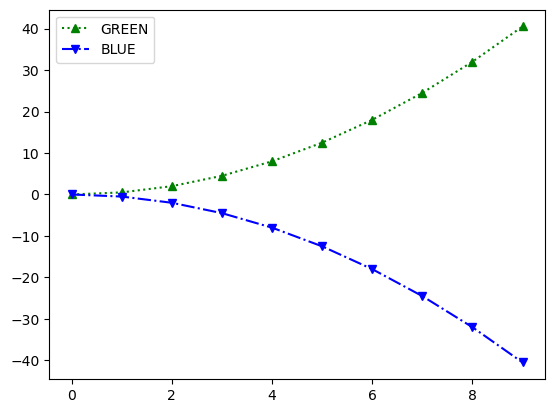

In [33]:
fig, ax1 = plt.subplots()

ax1.plot(x,y, 'g^:')
ax1.plot(x,-y, 'bv-.')
ax1.legend(labels=['GREEN','BLUE']) # 그래프 함수가 라벨을 갖지 않는 경우

plt.show()